# Drug Use and Health Project

## first plot

In [1]:
# Import required modules
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt

Import the data and variable categories

In [2]:
df = pd.read_csv('MyData.csv', header=0)
df_v = pd.read_csv('variable.csv', header=0)

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (2502) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Get the mental illness variables as feature

In [3]:
mental = []
n = 0
for i in df_v['CODEBOOK MODULE']:
    if ( i == 'RECODED MENTAL HEALTH' ):
        mental.append(df_v['VARIABLE'][n])
    n += 1
mental
mental[0]

'K6SCMON'

get the RC-NDSS SCORE as the label

In [4]:
label = df['NDSSANSP'.lower()]
label = round(label)
label = np.nan_to_num(label)
label

array([0., 3., 2., ..., 0., 0., 0.])

get the new data frame with useful variable

In [5]:
df3 = pd.DataFrame()
for i in mental:
    if i in df.columns.values.tolist():
        df3 = pd.concat([df3, df[i]], axis=1)
    else:
        df3 = pd.concat([df3, df[i.lower()]], axis=1)
print(df3) 

       K6SCMON  spdmon  K6SCYR  K6SCMAX  spdyr  mhsuithk  MHSUTK_U  mhsuipln  \
0          3.0     0.0     5.0      5.0    0.0       0.0       0.0       0.0   
1          0.0     0.0     NaN      0.0    0.0       0.0       0.0       0.0   
2          5.0     0.0     NaN      5.0    0.0       0.0       0.0       0.0   
3          4.0     0.0     NaN      4.0    0.0       0.0       0.0       0.0   
4          3.0     0.0     3.0      3.0    0.0       0.0       0.0       0.0   
5          0.0     0.0     NaN      0.0    0.0       0.0       0.0       0.0   
6          5.0     0.0     NaN      5.0    0.0       0.0       0.0       0.0   
7          7.0     0.0    16.0     16.0    1.0       0.0       0.0       0.0   
8          6.0     0.0     NaN      6.0    0.0       0.0       0.0       0.0   
9          NaN     NaN     NaN      NaN    NaN       NaN       NaN       NaN   
10         9.0     0.0     NaN      9.0    0.0       0.0       0.0       0.0   
11         5.0     0.0     3.0      5.0 

scale the data

In [6]:
df3_scaled = np.nan_to_num(df3.values)
df3_scaled = preprocessing.scale(df3_scaled)
df3_scaled = pd.DataFrame(df3_scaled, columns=df3.columns.values)
df3_scaled

,K6SCMON,spdmon,K6SCYR,K6SCMAX,spdyr,mhsuithk,MHSUTK_U,mhsuipln,mhsuitry,WSPDSC2,...,SMIYR_U,AMIYR_U,SMMIYR_U,MMIYR_U,LMIYR_U,lmmiyru,MI_CAT_U,smisudpy,amisudpy,lmmisudpy
0,-0.102334,-0.257287,0.408129,0.098131,-0.365126,-0.219555,-0.219555,-0.123467,-0.085246,-0.428078,...,-0.219911,-0.451032,-0.316194,-0.216469,-0.291163,-0.374348,-0.402335,0.583936,0.611378,-0.154620
1,-0.737790,-0.257287,-0.469667,-0.743390,-0.365126,-0.219555,-0.219555,-0.123467,-0.085246,-0.428078,...,-0.219911,-0.451032,-0.316194,-0.216469,-0.291163,-0.374348,-0.402335,0.583936,0.611378,-0.154620
2,0.321304,-0.257287,-0.469667,0.098131,-0.365126,-0.219555,-0.219555,-0.123467,-0.085246,-0.428078,...,-0.219911,-0.451032,-0.316194,-0.216469,-0.291163,-0.374348,-0.402335,0.583936,0.611378,-0.154620
3,0.109485,-0.257287,-0.469667,-0.070174,-0.365126,-0.219555,-0.219555,-0.123467,-0.085246,-0.428078,...,-0.219911,-0.451032,-0.316194,-0.216469,-0.291163,-0.374348,-0.402335,0.583936,0.611378,-0.154620
4,-0.102334,-0.257287,0.057011,-0.238478,-0.365126,-0.219555,-0.219555,-0.123467,-0.085246,-0.428078,...,-0.219911,-0.451032,-0.316194,-0.216469,-0.291163,-0.374348,-0.402335,0.583936,0.611378,-0.154620
5,-0.737790,-0.257287,-0.469667,-0.743390,-0.365126,-0.219555,-0.219555,-0.123467,-0.085246,-0.428078,...,-0.219911,-0.451032,-0.316194,-0.216469,-0.291163,-0.374348,-0.402335,0.583936,0.611378,-0.154620
6,0.321304,-0.257287,-0.469667,0.098131,-0.365126,-0.219555,-0.219555,-0.123467,-0.085246,-0.428078,...,-0.219911,-0.451032,-0.316194,-0.216469,-0.291163,-0.374348,-0.402335,0.583936,0.611378,-0.154620
7,0.744942,-0.257287,2.339282,1.949477,2.738778,-0.219555,-0.219555,-0.123467,-0.085246,2.022247,...,-0.219911,2.217137,-0.316194,-0.216469,3.434504,2.671310,0.912215,0.583936,-0.553423,6.467457
8,0.533123,-0.257287,-0.469667,0.266435,-0.365126,-0.219555,-0.219555,-0.123467,-0.085246,-0.428078,...,-0.219911,-0.451032,-0.316194,-0.216469,-0.291163,-0.374348,-0.402335,0.583936,0.611378,-0.154620
9,-0.737790,-0.257287,-0.469667,-0.743390,-0.365126,-0.219555,-0.219555,-0.123467,-0.085246,-0.428078,...,-0.219911,-0.451032,-0.316194,-0.216469,-0.291163,-0.374348,-0.402335,-1.744692,-1.718225,-0.154620


Classify by decision tree

In [7]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(df3_scaled, label)


visualization

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0654084 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0654084 to fit



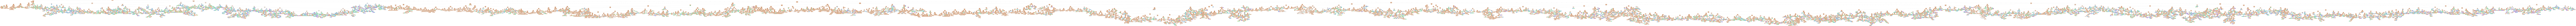

In [8]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png("out.png")
graph.write_pdf("output.pdf") 
Image(graph.create_png())

From the plot, we can see the "RC-K6 WORSET SCORE OF PAST YEAR" is the most important factor that influence the drug abuse. RC-K6 is a measure of mderate mental distress, which truly prove the worse mental condition would lead to the drug abuse. The next important factor is "RC-WHODAS TOTAL SCORE" which is a disability assessment. The third factor is "RC-K6 Total SCORE OF PAST YEAR", this is a little bit difference from worset score. A person is in an average bad mental condition is better than a person suffered a severe bad mental condition in the aspects of drug use contribution.